In [1]:
import pandas as pd
import math
import random

<Axes: >

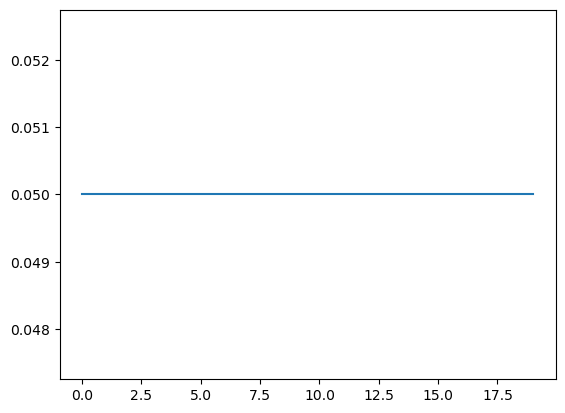

In [9]:
""" you can change these fields to alter the output """
state_space = 20
max_k = 1000

"""
Case 1, plot out the values for p = .25 and q = .25
"""

values = [1/state_space for i in range(0, 20)]
case_one_pmf_series = pd.Series(values)
case_one_pmf_series.plot()

0     0.166717
1     0.111145
2     0.074096
3     0.049398
4     0.032932
5     0.021954
6     0.014636
7     0.009758
8     0.006505
9     0.004337
10    0.004337
11    0.006505
12    0.009758
13    0.014636
14    0.021954
15    0.032932
16    0.049398
17    0.074096
18    0.111145
19    0.166717
dtype: float64


<Axes: >

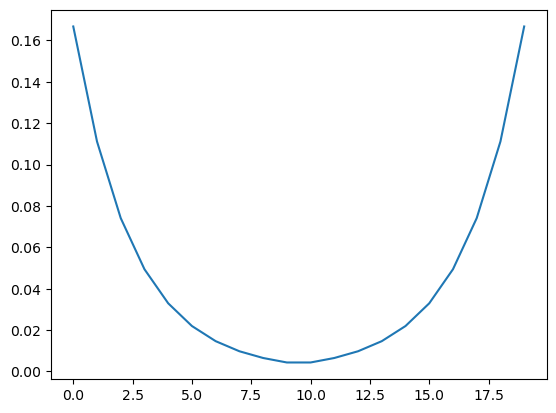

In [10]:
"""
Case 2, plot out the values for p = .3, q = .2
"""

# PMF function. NOTE: for this one, the sum of the values came out to .99.  I'm assuming this was due to rounding errors
def get_case_two_pmf(i):
    midpoint = state_space / 2
    left_p = 2/3
    right_p = 3/2
    if i < midpoint:
        return _calculate_pdf(i, left_p)
    return _calculate_pdf(i, right_p)

def _calculate_pdf(i, p):
    # normalize values since each side is worth .5
    normalizer = .5
    numerator = (1 - p) * p**i
    denominator = 1 - p**state_space
    return normalizer * ( numerator / denominator)

case_two_pmf = [get_case_two_pmf(i) for i in range(0, 20)]
case_two_series = pd.Series(case_two_pmf)
print(case_two_series)
case_two_series.plot()


<Axes: >

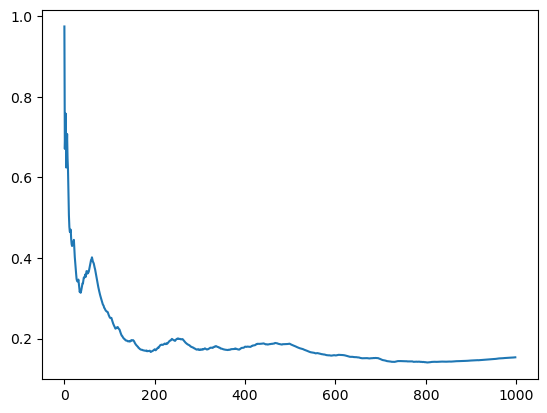

In [11]:
"""
Question 1.4: Write a program for the values with k = 1, ...., 1000
Case 1 p = q = .25 
"""
# we'll use the same steady state value for each ith steady state
uniform_pdf = 1 / state_space

"""
Function to calculate the distance between the state distribution and the steady state distribution
I believe the state distribution is looking for a frequency of each state after a given k, so that's how we'll model this
a frequency represents the number of times k steps that resulted in the chain landing on a particular node. ie for k = 1 we know it is on nodeO, so frequency of node0 is 1/1 = 1
the uniform pmf is what we expect the steady state to be at, so at k = 1, 2, .... m we expect all nodes to be 1/20
"""
def find_distance_between_current_state_and_steady_state(frequencies, k):
    distance = 0
    for current_state in frequencies:
        cur_distance = abs(uniform_pdf - (current_state / k))
        distance += cur_distance ** 2
    return math.sqrt(distance)

"""
 function to get next position.  Passing in birth so we can reuse
"""
def get_next_position(current_position, birth):
    random_move = random.random()
    
    # all nodes have .5 self loop, so we'll short early with this check
    if random_move <= .5:
        return current_position
    # end node:
    if current_position == 0:
        return current_position + 1
    if current_position == (state_space - 1):
        return current_position - 1
    # treat this sort of like a CDF: we've already returned if it's less than .5, so .5 < random_move <= .5 + birth
    if random_move <= float(.5 + birth):
        return current_position + 1
    # remaining probability must be to move backwards
    return current_position - 1
    

def increment_frequency(frequencies, i):
    frequencies[i] = frequencies[i] + 1
    

# set up initial frequencies
frequencies = [0 for i in range(0, 20)]
distances = []

# I'm not totally clear if we should count initial state as a frequency for nodeO, but I'm going to do that and consider k = 1 as the first step FROM Node0 and include initial 0 as a frequency
states = [0]
for k in range (1, max_k):
    
    increment_frequency(frequencies, states[-1])
    cur_distance = find_distance_between_current_state_and_steady_state(frequencies, k)
    distances.append(cur_distance)
    next_state = get_next_position(states[-1], .25)
    states.append(next_state)
    

""" Distances plotted over k = 0 to k = 1000"""
distance_series = pd.Series(distances)
distance_series.plot()

<Axes: >

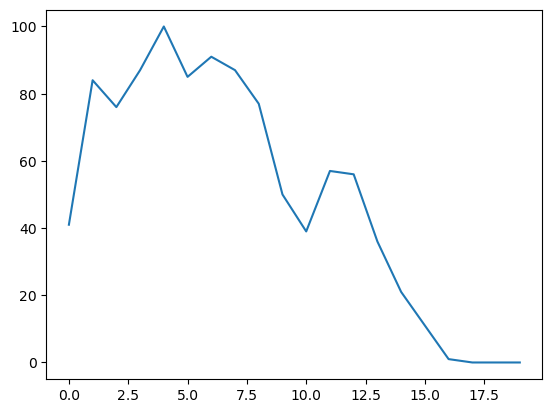

In [12]:
""" frequencies plotted at completion """
frequencies_series = pd.Series(frequencies)
frequencies_series.plot()

<Axes: >

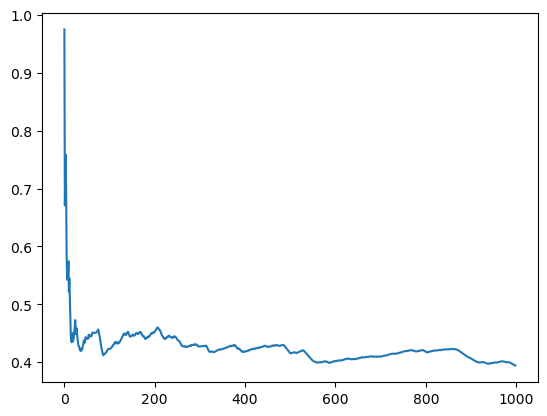

In [13]:
"""
Question 1.4
Case 2: p = 0.2 q = 0.3
NOTE: This cell reuses functions from prior cells
"""

def find_distance_between_current_state_and_steady_state_v2(frequencies, k):
    distance = 0
    for i in range(0, len(frequencies)):
        current_state = frequencies[i]
        expected_frequency = case_two_pmf[i]
        cur_distance = abs(expected_frequency - (current_state / k))
        distance += cur_distance ** 2
    return math.sqrt(distance)

frequencies_v2 = [0 for i in range(0, state_space)]
distances_v2 = []
states_v2 = [0]
for k_v2 in range(1, max_k):
    increment_frequency(frequencies_v2, states_v2[-1])
    cur_distance = find_distance_between_current_state_and_steady_state(frequencies_v2, k_v2)
    distances_v2.append(cur_distance)
    birth = .2 if states_v2[-1] < (state_space / 2) else .3
    next_state = get_next_position(states_v2[-1], birth)
    states_v2.append(next_state)

distance_series_v2 = pd.Series(distances_v2)
distance_series_v2.plot()

<Axes: >

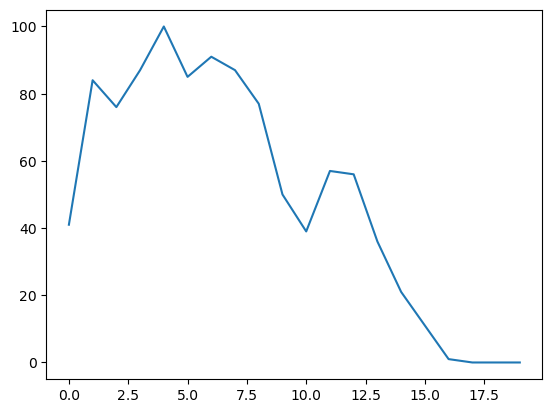

In [14]:
frequencies_v2_series = pd.Series(frequencies_v2)
frequencies_series.plot()

<Axes: >

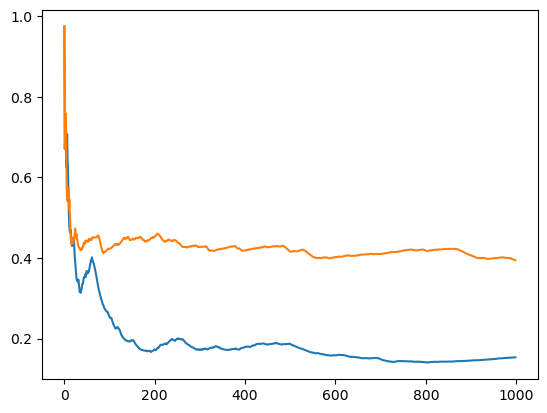

In [15]:
""" distance comparison 
    it does appear that Case 1 drops faster than Case 2, meaning Case 1 approaches steady state more rapidly than case 2
"""
distance_series.plot()
distance_series_v2.plot()